Descriptive Statistics

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df_diesel_price = pd.read_csv("diesel_price.csv")

In [45]:
df_diesel_price.describe()

,Diesel price,Detrend by a differencing,Predicted values,Detrend After Predicted
count,33.000000,23.000000,32.000000,32.000000
mean,6.205152,0.082174,6.243125,0.065313
std,1.612116,0.932733,1.356836,0.273307
min,3.200000,-1.570000,3.760000,-0.510000
25%,5.120000,-0.365000,5.357500,-0.070000
50%,5.950000,0.060000,5.935000,0.125000
75%,7.080000,0.440000,6.940000,0.242500
max,9.590000,2.170000,9.080000,0.560000


In [6]:
grouped_data = df_diesel_price.groupby(["Diesel price"])
grouped_data["Diesel price"].describe().head()

,count,mean,std,min,25%,50%,75%,max
Diesel price,,,,,,,,
3.20,1.0,3.20,NaN,3.20,3.20,3.20,3.20,3.20
4.00,1.0,4.00,NaN,4.00,4.00,4.00,4.00,4.00
4.60,1.0,4.60,NaN,4.60,4.60,4.60,4.60,4.60
4.80,1.0,4.80,NaN,4.80,4.80,4.80,4.80,4.80
4.99,1.0,4.99,NaN,4.99,4.99,4.99,4.99,4.99


In [7]:

print("##############################################")
print("        Measures of central tendency          ")
print("Mean:",np.mean(df_diesel_price["Diesel price"], axis=0))
print("Median:",np.median(df_diesel_price["Diesel price"], axis=0))
#print("Mode:",np.mode(df_diesel_price["Diesel price"], axis=0))
print("##############################################")


print("\n############################################")
print("            Measures of variability           ")
print("Variance:",df_diesel_price["Diesel price"].var())
print("Standard deviation:", np.std(df_diesel_price["Diesel price"], axis=0, ddof=1))
print("Range:", np.ptp(df_diesel_price["Diesel price"], axis=0))
print("Interquartile range:",np.quantile(df_diesel_price["Diesel price"],[.25, .5, .75], axis=0))
print("############################################")

##############################################
        Measures of central tendency          
Mean: 6.205151515151515
Median: 5.95
##############################################

############################################
            Measures of variability           
Variance: 2.5989195075757574
Standard deviation: 1.6121164683656568
Range: 6.39
Interquartile range: [5.12 5.95 7.08]
############################################


In [8]:
df_diesel_price["Diesel price"].mean()

6.205151515151515

In [9]:
df_diesel_price["Diesel price"].median()

5.95

In [10]:
df_diesel_price["Diesel price"].mode()

0    5.10
1    5.13
Name: Diesel price, dtype: float64

In [11]:
df_diesel_price["Diesel price"].std()

1.6121164683656568

In [12]:
df_diesel_price["Diesel price"].var()

2.5989195075757574

In [13]:
df_diesel_price["Diesel price"].quantile([.25, .5, .75])

0.25    5.12
0.50    5.95
0.75    7.08
Name: Diesel price, dtype: float64

In [14]:
df_diesel_price["Diesel price"].max()

9.59

In [15]:
df_diesel_price["Diesel price"].min()

3.2

Boxplots

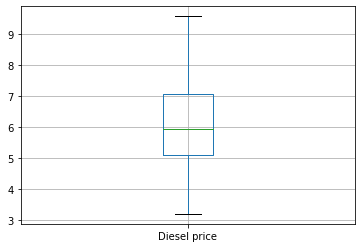

In [16]:
df_diesel_price.boxplot(column="Diesel price")

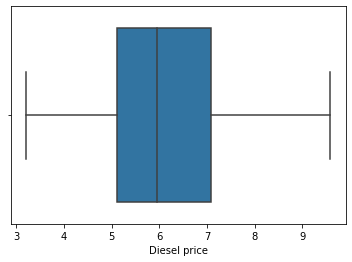

In [17]:
sns.boxplot(x="Diesel price",data=df_diesel_price)

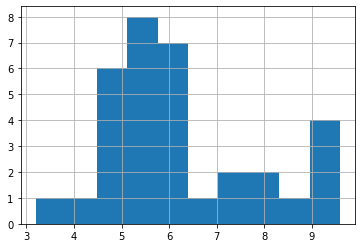

In [18]:
df_diesel_price["Diesel price"].hist()

In [19]:
from scipy.stats import ttest_1samp
import numpy as np
#print(df_diesel_price["Diesel price"].count)
diesel_mean = np.mean(df_diesel_price["Diesel price"])
diesel_mean
#print(diesel_mean)

6.205151515151515

In [20]:
tset, pval = ttest_1samp(diesel_mean, 6.2)
print("p-values",pval)
if pval < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

p-values nan
we are accepting null hypothesis


C:\Users\pandi\anaconda3\lib\site-packages\scipy\stats\_axis_nan_policy.py:502: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\pandi\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\pandi\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1214: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


<h2>One Sample T-Test</h2>

In [21]:
import scipy.stats as stats
import pandas as pd
print("######################")
print("One Sample T-test")
print("######################")
t_statistic, p_value = stats.ttest_1samp(a=df_diesel_price["Diesel price"], popmean=6.2)
print("Statistic:",round(t_statistic,2))
print("p-value:",round(p_value,2))

######################
One Sample T-test
######################
Statistic: 0.02
p-value: 0.99


As the p_value for the given data sample is more than 0.05 
So,we accept the null hypothesis and the alternative hypothesis is rejected.

<h2>Two-Sample T-Test</h2>

In [22]:
import scipy.stats as stats
df_diesel_price_set1 = np.array([5,6,5.6,5.12,5.1,5.34,5.45,4,6.17,4.6,3.2,5.13,4.99,5.2,6.08,5.95,5.13,4.8])
df_diesel_price_set2  = np.array([5.1,5.67,5.98,6.04,6.89,7.37,7.85,8.64,9.59,9.11,9.27,9.36,7.69,6.27])
print("###############################")
print("Mean for price set 1 and 2")
print("###############################")
print(np.mean(df_diesel_price_set1))
print(np.mean(df_diesel_price_set2))
print("\n\n###############################")
print("Two-Sample T-Test")
print("###############################")
stats.ttest_ind(a=df_diesel_price_set1, b=df_diesel_price_set2, equal_var=True)

###############################
Mean for price set 1 and 2
###############################
5.158888888888889
7.487857142857142


###############################
Two-Sample T-Test
###############################


Ttest_indResult(statistic=-5.684148079534916, pvalue=3.38088331693646e-06)

Two sample t-test has the following hypothesis:

H(0) => µ1 = µ2 (Mean of set1 is equal to set2)

H(A) => µ1 ≠µ2 (Mean of set1 is NOT equal to set)

Here, since the p-value (3.38088) is greater than alpha = 0.05 
and mean not equal so we cannot reject the null hypothesis. 


<h2> one-sample Z test 

In [23]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(df_diesel_price["Diesel price"], x2=None, value=6.2)
print("#######################")
print("   One-sample Z test   ")
print("#######################")
print(float(pval))
if pval<0.05:
    print("p-value <0.05 \nReject null hypothesis")
else:
    print("p-value >0.05 \nAccept null hypothesis")

#######################
   One-sample Z test   
#######################
0.9853542637672824
p-value >0.05 
Accept null hypothesis


In [24]:
ztest ,pval1 = stests.ztest(df_diesel_price_set1, x2=df_diesel_price_set2, value=0,alternative='two-sided')
print("#######################")
print("   Two-sample Z test   ")
print("#######################")
print(float(pval1))
if pval<0.05:
    print("p-value <0.05 \nReject null hypothesis")
else:
    print("p-value >0.05\nAccept null hypothesis")

#######################
   Two-sample Z test   
#######################
1.3146633287005285e-08
p-value >0.05
Accept null hypothesis


In [25]:
import numpy as np
import scipy.stats

print("#########################")
print(" The variance  of set 1 and 2")
print("#########################")

print(np.var(df_diesel_price_set1))
print(np.var(df_diesel_price_set2))

f_test = np.var(df_diesel_price_set1, ddof=1)/np.var(df_diesel_price_set2, ddof=1)
nun = np.array(df_diesel_price_set1).size-1
dun = np.array(df_diesel_price_set2).size-1
p_value = 1-scipy.stats.f.cdf(f_test, nun, dun)
print("\n#######################")
print("   F test   ")
print("#######################")
print(float(p_value))
if p_value<0.05:
    print("p-value <0.05 \nReject null hypothesis")
else:
    print("p-value >0.05\nAccept null hypothesis")

#########################
 The variance  of set 1 and 2
#########################
0.5110987654320989
2.175831122448979

#######################
   F test   
#######################
0.9971210073821054
p-value >0.05
Accept null hypothesis


In [30]:
# Importing library
from scipy.stats import f_oneway

df_diesel_price_set1 = np.array([5,6,5.6,5.12,5.1,5.34,5.45,4,6.17])
df_diesel_price_set2 = np.array([4.6,3.2,5.13,4.99,5.2,6.08,5.95,5.13,4.8])
df_diesel_price_set3  = np.array([5.1,5.67,5.98,5.34,5.45,4,6.17])
df_diesel_price_set4 = np.array([7.37,7.85,8.64,9.59,9.11,9.27])

print("###############################")
print("      Mean for all 4 sets     ")
print("###############################")
print(np.mean(df_diesel_price_set1))
print(np.mean(df_diesel_price_set2))
print(np.mean(df_diesel_price_set3))
print(np.mean(df_diesel_price_set4))


print("\n\n#########################")
print("The one-way ANOVA Test")
print("#########################")
f_oneway(df_diesel_price_set1, df_diesel_price_set2, df_diesel_price_set3, df_diesel_price_set4)


###############################
      Mean for all 4 sets     
###############################
5.308888888888889
5.0088888888888885
5.387142857142857
8.638333333333334


#########################
The one-way ANOVA Test
#########################


F_onewayResult(statistic=32.931723147830255, pvalue=3.6217439172213854e-09)

In [ ]:
the p-value is greater than 0.05 hence we would accept null hypothesis. 

##################################################
Box-Cox Transformation Implementation (Lamda -1)  
#################################################


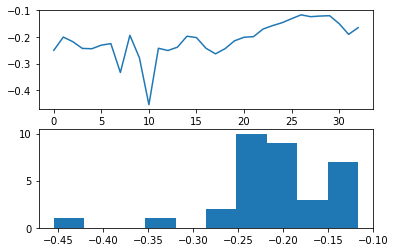

In [37]:
print("##################################################")
print("Box-Cox Transformation Implementation (Lamda -1)  ")
print("#################################################")
df_diesel_price["Diesel price"] = boxcox(df_diesel_price["Diesel price"], lmbda=-1)
pyplot.figure(1)
pyplot.subplot(211)
pyplot.plot(df_diesel_price["Diesel price"] )
pyplot.subplot(212)
pyplot.hist(df_diesel_price["Diesel price"] )
pyplot.show()

#####################################################
Box-Cox Transformation Implementation (Lamda -0.5)   
#####################################################


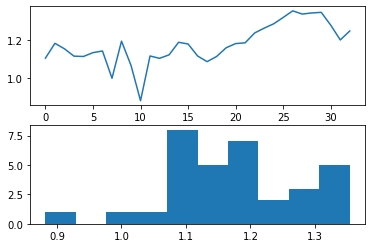

In [41]:
print("#####################################################")
print("Box-Cox Transformation Implementation (Lamda -0.5)   ")
print("#####################################################")
df_diesel_price["Diesel price"] = boxcox(df_diesel_price["Diesel price"], lmbda=-0.5)
pyplot.figure(1)
pyplot.subplot(211)
pyplot.plot(df_diesel_price["Diesel price"] )
pyplot.subplot(212)
pyplot.hist(df_diesel_price["Diesel price"] )
pyplot.show()

#####################################################
Box-Cox Transformation Implementation (Lamda 0.0    
#####################################################


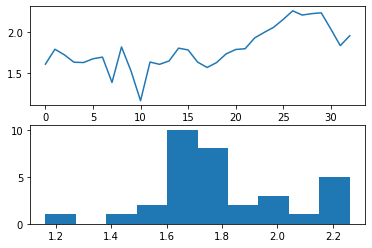

In [46]:
from scipy.stats import boxcox
from matplotlib import pyplot
print("#####################################################")
print("Box-Cox Transformation Implementation (Lamda 0.0    ")
print("#####################################################")
df_diesel_price["Diesel price"] = boxcox(df_diesel_price["Diesel price"], lmbda=0.0)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(df_diesel_price["Diesel price"] )
# histogram
pyplot.subplot(212)
pyplot.hist(df_diesel_price["Diesel price"] )
pyplot.show()

##################################################
Box-Cox Transformation Implementation (Lamda 0.5)  
#################################################


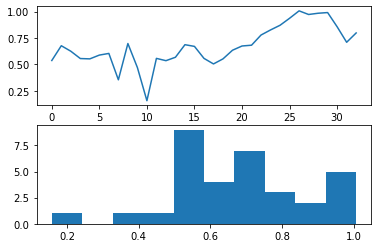

In [47]:
print("##################################################")
print("Box-Cox Transformation Implementation (Lamda 0.5)  ")
print("#################################################")
df_diesel_price["Diesel price"] = boxcox(df_diesel_price["Diesel price"], lmbda=0.5)
pyplot.figure(1)
pyplot.subplot(211)
pyplot.plot(df_diesel_price["Diesel price"] )
pyplot.subplot(212)
pyplot.hist(df_diesel_price["Diesel price"] )
pyplot.show()

##################################################
Box-Cox Transformation Implementation (Lamda 1.0)  
#################################################


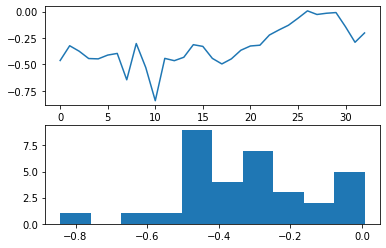

In [48]:
print("##################################################")
print("Box-Cox Transformation Implementation (Lamda 1.0)  ")
print("#################################################")
df_diesel_price["Diesel price"] = boxcox(df_diesel_price["Diesel price"], lmbda=1.0)
pyplot.figure(1)
pyplot.subplot(211)
pyplot.plot(df_diesel_price["Diesel price"] )
pyplot.subplot(212)
pyplot.hist(df_diesel_price["Diesel price"] )
pyplot.show()